In [1]:
import pandas as pd
import sqlite3
import F1DB
import QueryDisplayF1DB
import matplotlib.pyplot as plt

In [2]:
#Import all functions from F1DB & QueryDisplayF1DB
from F1DB  import *
from QueryDisplayF1DB import *
# Provide the location of the database and its sample name
path= "C:/Users/user/Downloads/f1db_csv"
database_name="F1DB"
#Create the F1DB using the function, create_Sqlite_connection under "/Users/user/DBModule"
connection=create_Sqlite_connection(path, database_name)

C:/Users/user/Downloads/f1db_csvF1DB
Database created.
Changes saved.


In [3]:
path = "C:/Users/user/Downloads/f1db_csv/"
filename1 = "results.csv"
filename2 = "constructors.csv"
filename3 = "drivers.csv"
filename4 = "races.csv"
filename5 = "pit_stops.csv"
filename6 = "circuits.csv"
filename7 = "lap_times.csv"

# Read the csv using the function, readcsv
df1 = readcsv(path, filename1)
df2 = readcsv(path, filename2)
df3 = readcsv(path, filename3)
df4 = readcsv(path, filename4)
df5 = readcsv(path, filename5)
df6 = readcsv(path, filename6)
df7 = readcsv(path, filename7)

# writecsv_to_db
tablename1="results" 
table_name1=writecsv_to_db(df1, tablename1)

tablename2="constructors" 
table_name2=writecsv_to_db(df2, tablename2)

tablename3="drivers"
table_name3=writecsv_to_db(df3, tablename3)

tablename4="races" 
table_name4=writecsv_to_db(df4, tablename4)

tablename5="pit_stops" 
table_name5=writecsv_to_db(df5, tablename5)

tablename6="circuits" 
table_name6=writecsv_to_db(df6, tablename6)

tablename7="lap_times"
table_name7=writecsv_to_db(df7, tablename7)


C:/Users/user/Downloads/f1db_csv/results.csv
C:/Users/user/Downloads/f1db_csv/constructors.csv
C:/Users/user/Downloads/f1db_csv/drivers.csv
C:/Users/user/Downloads/f1db_csv/races.csv
C:/Users/user/Downloads/f1db_csv/pit_stops.csv
C:/Users/user/Downloads/f1db_csv/circuits.csv
C:/Users/user/Downloads/f1db_csv/lap_times.csv
results
constructors
drivers
races
pit_stops
circuits
lap_times


In [4]:
#Visualization 1,1 How many points has each constructor scored?

Q1_a='''SELECT constructorId, sum(points) as total_points_scored from results 
group by constructorId having sum(points)>700'''

# Assuming 'connection' is your database connection object
QV1A_df = displaydbtable(Q1_a, connection)

# Display the first few rows of the DataFrame
QV1A_df

SELECT constructorId, sum(points) as total_points_scored from results 
group by constructorId having sum(points)>700


,constructorId,total_points_scored
0,1,6164.50
1,3,3599.00
2,4,1777.00
3,6,10222.27
4,9,6619.00
5,10,1098.00
6,22,861.50
7,25,711.00
8,32,995.00
9,131,7068.64


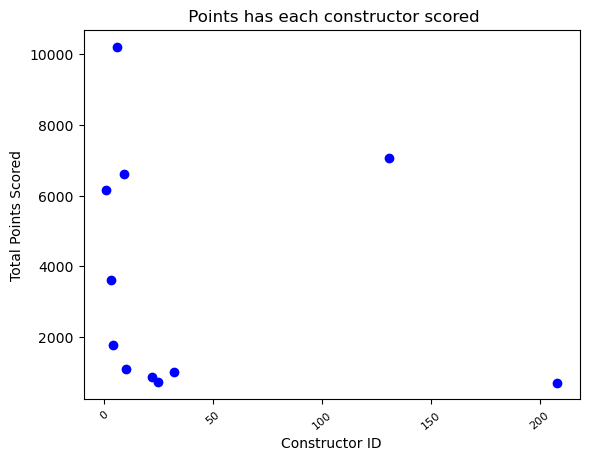

In [5]:
value1 = QV1A_df['constructorId']  
value2= QV1A_df['total_points_scored']
plt.title(' Points has each constructor scored')
plt.xlabel('Constructor ID')
plt.ylabel('Total Points Scored')
displayscatter(value1, value2, color="blue",fontsize=8 ,rotation=40 )
plt.show() 

In [6]:
#Visualization 1,2   In how many races does each constructor participates?

Q1_b = '''SELECT constructorId, count(raceId) as no_of_races FROM results 
GROUP BY constructorId HAVING count(raceId) > 600'''

# Assuming 'connection' is your database connection object
QV1B_df = displaydbtable(Q1_b, connection)

# Display the first few rows of the DataFrame
QV1B_df

SELECT constructorId, count(raceId) as no_of_races FROM results 
GROUP BY constructorId HAVING count(raceId) > 600


,constructorId,no_of_races
0,1,1845
1,3,1599
2,4,787
3,6,2361
4,9,710
5,15,789
6,18,672
7,25,881
8,27,611
9,32,871


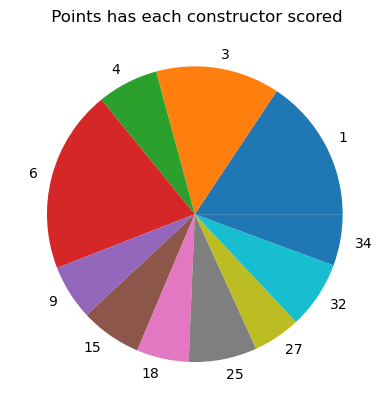

In [7]:
valuel = QV1B_df['constructorId']
value2= QV1B_df['no_of_races']
plt.title(' Points has each constructor scored')
displaypie(valuel, value2)
plt.show()

In [8]:
#Visualization 2 What is the trend of fastest lap times over the years per circuit?

Q2 = '''SELECT year, circuitId as "circuitId (Australian Grand Prix)", name, fastestLapTime
      FROM results 
      INNER JOIN races ON results.raceId =races.raceId 
      WHERE name= "Australian Grand Prix"
      GROUP BY year
      ORDER BY fastestLapTime asc'''

# Assuming 'connection' is your database connection object
QV2_df = displaydbtable(Q2, connection)

# Display the first few rows of the DataFrame
QV2_df

SELECT year, circuitId as "circuitId (Australian Grand Prix)", name, fastestLapTime
      FROM results 
      INNER JOIN races ON results.raceId =races.raceId 
      WHERE name= "Australian Grand Prix"
      GROUP BY year
      ORDER BY fastestLapTime asc


,year,circuitId (Australian Grand Prix),name,fastestLapTime
0,2023,1,Australian Grand Prix,1:20.235
1,2022,1,Australian Grand Prix,1:20.260
2,2004,1,Australian Grand Prix,1:24.125
3,2007,1,Australian Grand Prix,1:25.235
4,2019,1,Australian Grand Prix,1:25.580
5,2005,1,Australian Grand Prix,1:25.683
6,2018,1,Australian Grand Prix,1:25.945
7,2006,1,Australian Grand Prix,1:26.045
8,2017,1,Australian Grand Prix,1:26.538
9,2008,1,Australian Grand Prix,1:27.418


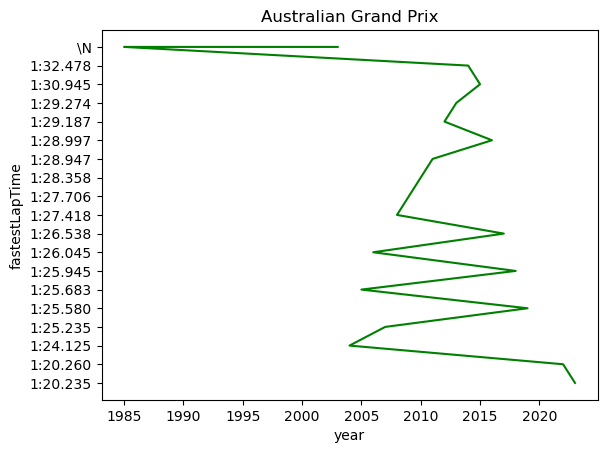

In [9]:
value1= QV2_df["year"] 
value2=QV2_df ["fastestLapTime"] 
plt.xlabel("year")
plt.ylabel("fastestLapTime")
plt.title("Australian Grand Prix")
displayline(value1, value2, color="green", linestyle="solid")
plt.show()

In [10]:
#Visualization 3 What is the trend of pit stop times over the years per constructor in a given circuit?

Q3= '''SELECT circuits.name ,races.year, AVG(pit_stops.time) AS avg_pit_stops_time
FROM pit_stops
INNER JOIN races ON pit_stops.raceId = races.raceId
INNER JOIN drivers ON pit_stops.driverId = drivers.driverId
INNER JOIN circuits ON races.circuitId = circuits.circuitId
GROUP BY  races.year ;'''

# Assuming 'connection' is your database connection object
QV3_df = displaydbtable(Q3, connection)

# Display the first few rows of the DataFrame
QV3_df

SELECT circuits.name ,races.year, AVG(pit_stops.time) AS avg_pit_stops_time
FROM pit_stops
INNER JOIN races ON pit_stops.raceId = races.raceId
INNER JOIN drivers ON pit_stops.driverId = drivers.driverId
INNER JOIN circuits ON races.circuitId = circuits.circuitId
GROUP BY  races.year ;


,name,year,avg_pit_stops_time
0,Albert Park Grand Prix Circuit,2011,15.325853
1,Albert Park Grand Prix Circuit,2012,15.281184
2,Albert Park Grand Prix Circuit,2013,15.281809
3,Albert Park Grand Prix Circuit,2014,15.573529
4,Albert Park Grand Prix Circuit,2015,15.114710
5,Albert Park Grand Prix Circuit,2016,15.170880
6,Albert Park Grand Prix Circuit,2017,15.461095
7,Albert Park Grand Prix Circuit,2018,15.608209
8,Albert Park Grand Prix Circuit,2019,15.486154
9,Red Bull Ring,2020,15.585859


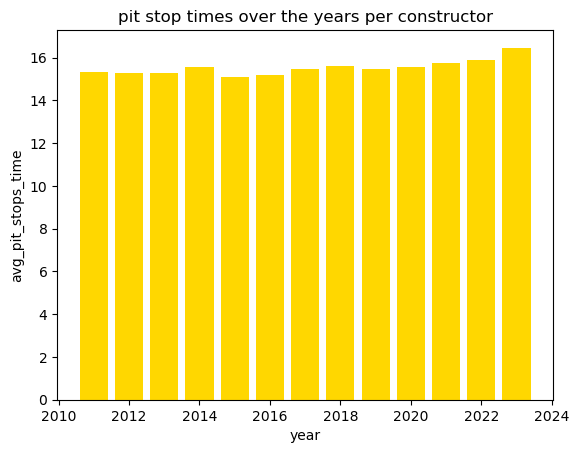

In [11]:
value1 = QV3_df['year']
value2 = QV3_df['avg_pit_stops_time']
plt.xlabel("year")
plt.ylabel("avg_pit_stops_time")
plt.title("pit stop times over the years per constructor")
displaybar(value1, value2, color='gold', width=.8)
plt.show()